## 📚 Exercise 1: Introducing Word Embeddings

In this exercise, we would train word embeddings from a state-of-the-art embeddings library (fastText). 

### Goal:
1. Load pretrained word embeddings using fastText library for `epfldocs.txt` data file
2. Visualize the embeddings using t-SNE algorithm
2. Find similar words by compuning the cosine similarity of their embedding vectors


### What you are learning in this exercise:
- Train word embeddings using fastText library
- Learn one way to visualize word embeddings
- How to use word embeddings to find similar words

### 1. FastText installation
The first step of the exercise is to install the fasttext library. Proceed with the following steps:

> pip install fasttext

If you are having problems, try this command:
> sudo apt-get install g++

### 2.1. Generate Embeddings

In [2]:
import numpy as np 
import fasttext

model = fasttext.train_unsupervised('epfldocs.txt', model = 'cbow')
vocabulary = model.words
word_embeddings = np.array([model[word] for word in vocabulary])

Read 0M words
Number of words:  432
Number of labels: 0
Progress: 100.0% words/sec/thread:  138955 lr:  0.000000 avg.loss:  3.384439 ETA:   0h 0m 0s


### 2.2. Use Pretrained Embeddings
If you are unable to install fasttext, you can use the preembeddings we provide (`model_epfldocs.vec`).

In [ ]:
import sys
import codecs
import numpy as np

# Edit this, or just move model_epfldocs.vec to the directory where this notebook is situated
directory_path = './'

def load_embeddings(file_name):
    with codecs.open(file_name, 'r', 'utf-8') as f_in:
        lines = f_in.readlines()
        lines = lines[1:]
        vocabulary, wv = zip(*[line.strip().split(' ', 1) for line in lines])
    wv = np.loadtxt(wv)
    return wv, vocabulary


# Replace the path based on your own machine.
word_embeddings, vocabulary = load_embeddings(directory_path + 'model_epfldocs.vec')




### 3. Visualize Embeddings

In the third phase of this exercise, we will visualize the generated embeddings using t-SNE (T-Distributed Stochastic Neighbouring Entities).

t-SNE is a dimensionality reduction algorithm which is well suited for such visualization tasks.


In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import logging

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, init = 'pca') 
vis_data = tsne.fit_transform(word_embeddings)

/opt/anaconda3/envs/adaexam/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/adaexam/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 432 samples in 0.000s...
[t-SNE] Computed neighbors for 432 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 432 / 432
[t-SNE] Mean sigma: 0.073826
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.680225
[t-SNE] KL divergence after 1000 iterations: 0.116735


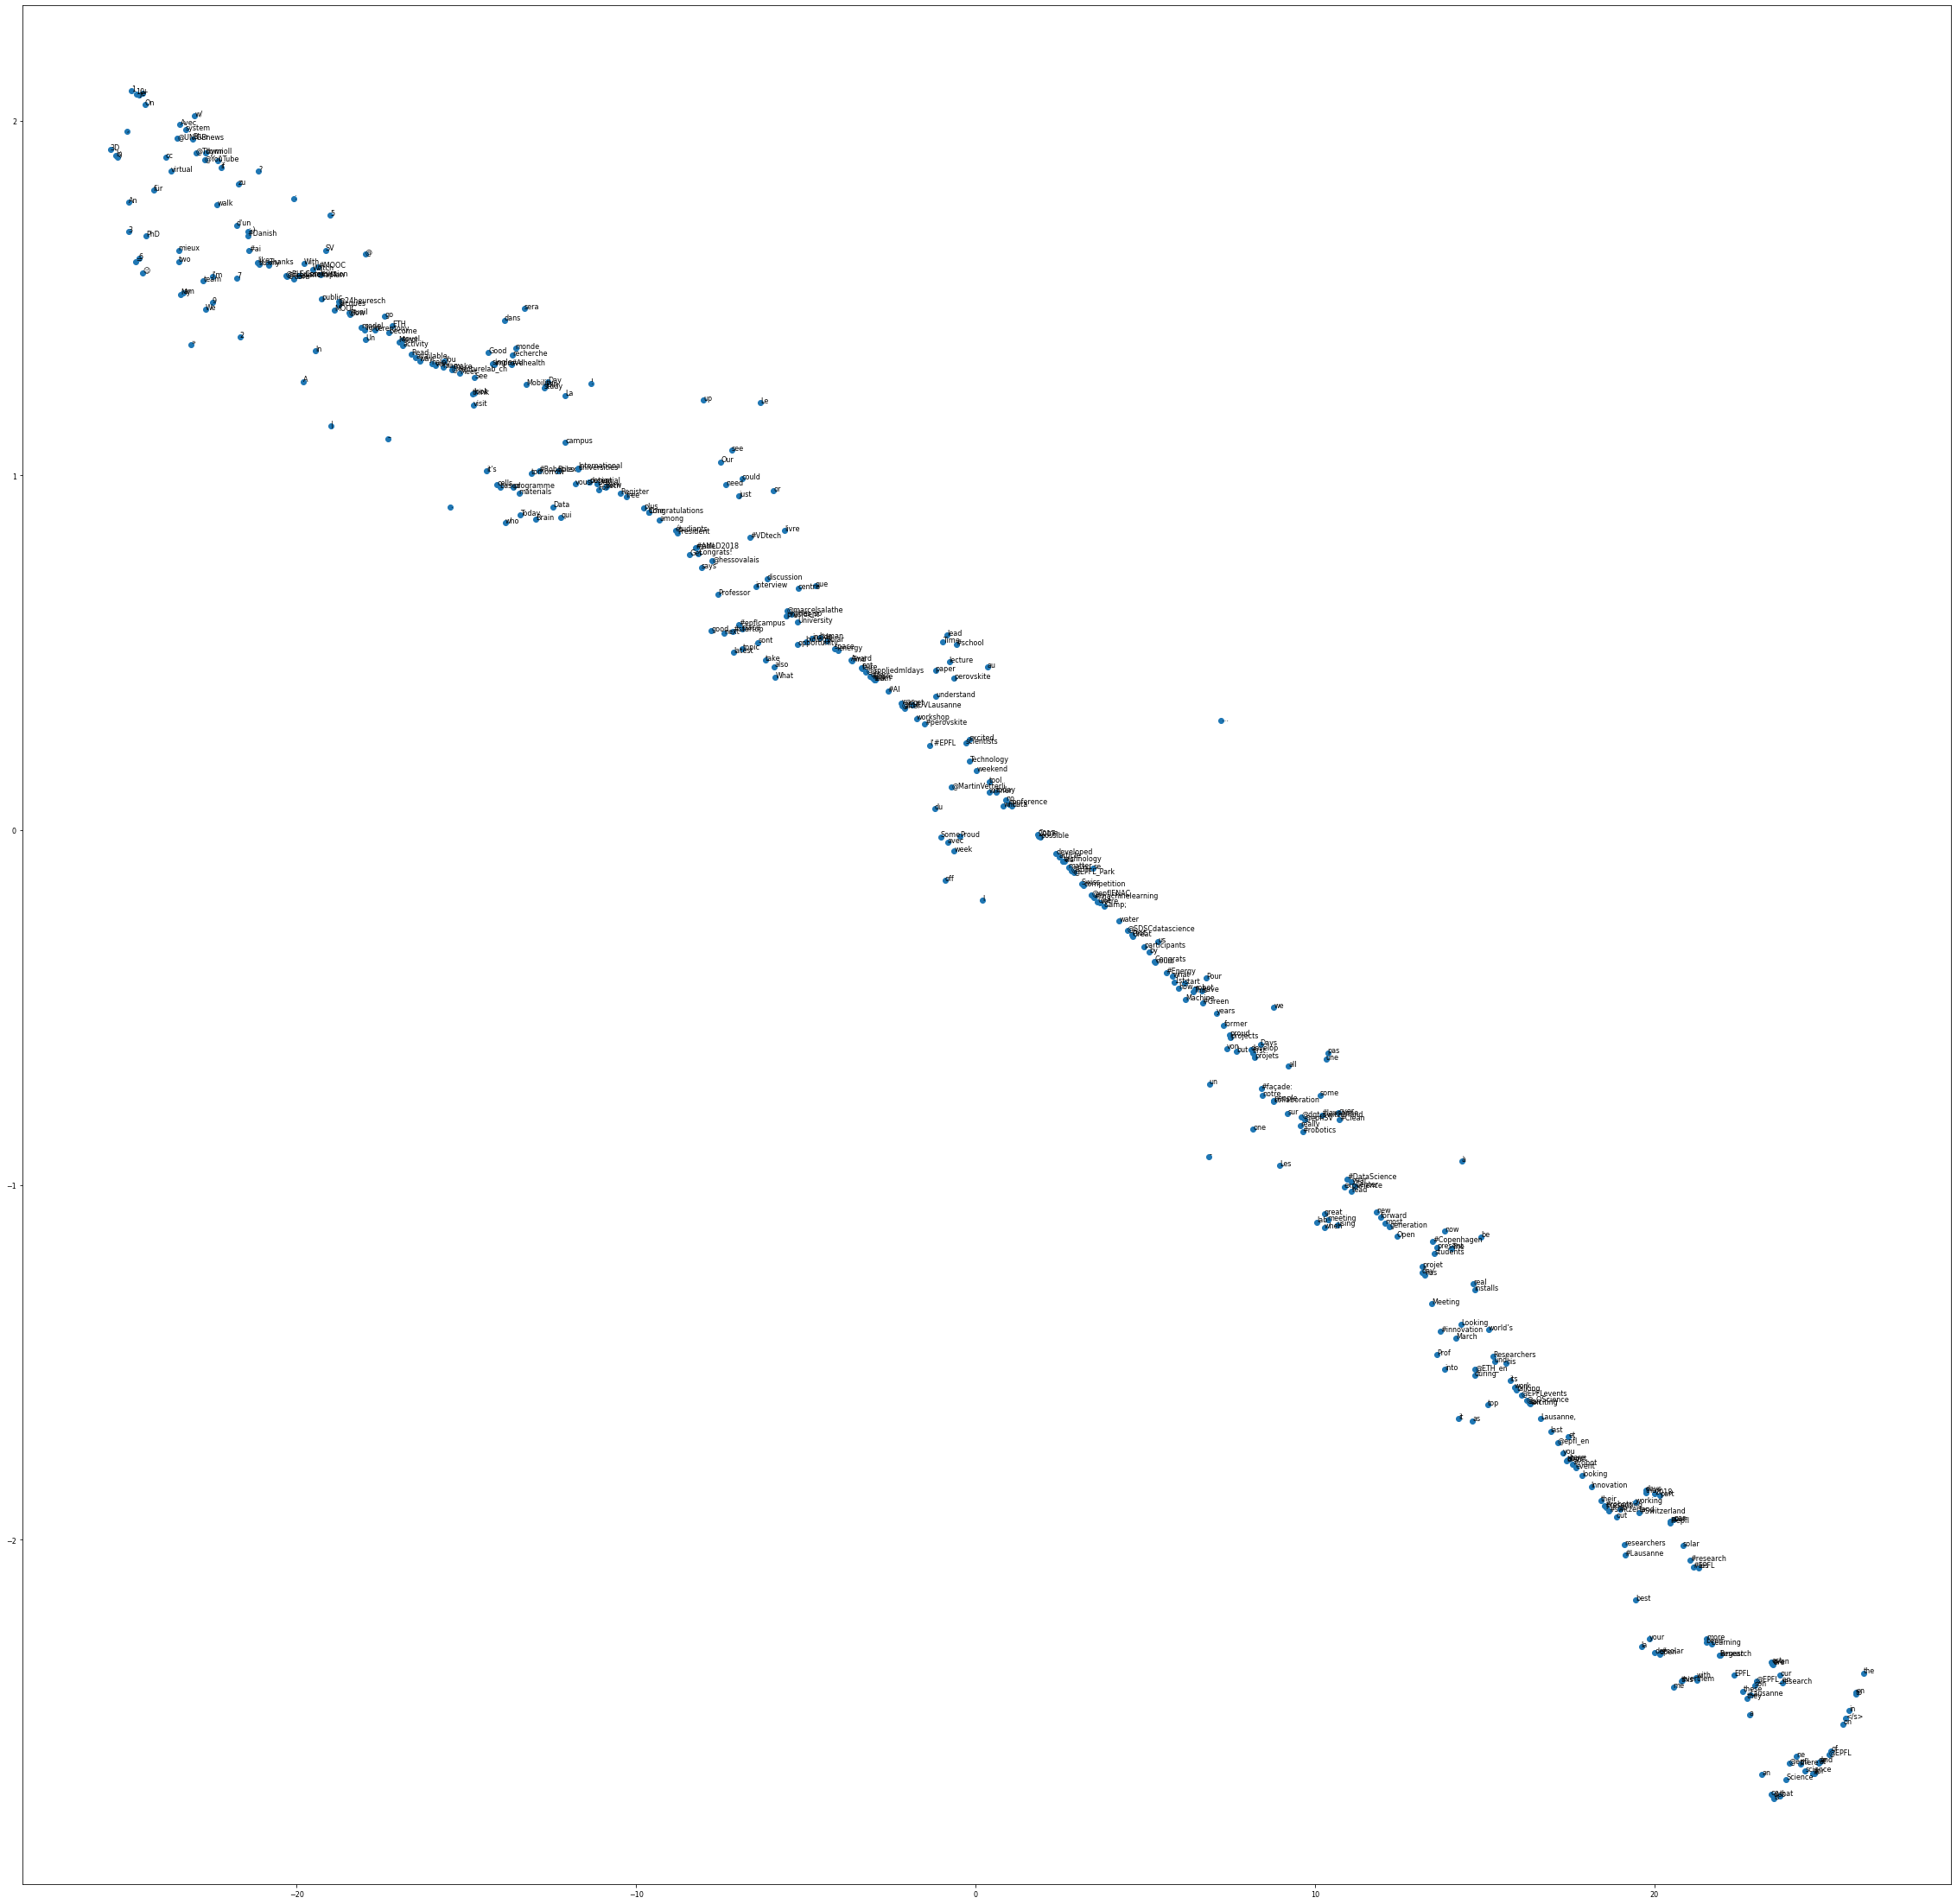

In [31]:
vis_data_x = vis_data[:,0]
vis_data_y = vis_data[:,1]

plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(40, 40)) 
plt.scatter(vis_data_x, vis_data_y)

for label, x, y in zip(vocabulary, vis_data_x, vis_data_y):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

### Questions:

1. Observe the plot of word embeddings. Do you observe any patterns?

2. Write a python function to find the most similar terms for a given term. The similarity between two terms is defined as the cosine similarity between their corresponding word embeddings. Find the top 5 terms that are most similar to 'la', 'EPFL', '#robot', 'this'


In [32]:
word_embeddings

array([[ 0.05036145,  0.6223592 , -0.3609676 , ...,  0.35999855,
        -0.33820933, -0.37689093],
       [ 0.05472949,  0.56423205, -0.3233177 , ...,  0.31966558,
        -0.30451527, -0.3439994 ],
       [ 0.08041619,  0.8240736 , -0.47590932, ...,  0.4711066 ,
        -0.44189578, -0.5066086 ],
       ...,
       [ 0.01856603,  0.20253786, -0.11502767, ...,  0.11434473,
        -0.11002598, -0.12286548],
       [ 0.01981936,  0.22279505, -0.12619632, ...,  0.12572551,
        -0.12026338, -0.13581721],
       [ 0.02171823,  0.19915615, -0.11554714, ...,  0.11168598,
        -0.10836736, -0.12056675]], dtype=float32)

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from operator import itemgetter

def find_most_similar(input_term, word_embeddings, vocabulary, num_terms=5):
    # Fill in your code
    if input_term in vocabulary:
        v1 = word_embeddings[vocabulary.index(input_term)]
        input_term_simi = [(vocabulary[i],cosine_similarity(v1.reshape(1, -1),v2.reshape(1, -1))) for i, v2 in enumerate(word_embeddings)]
    if input_term not in vocabulary:
        return "Term not in the vocabulary"
    return sorted(input_term_simi,key=itemgetter(1),reverse=True)[:num_terms]

find_most_similar('EPFL', word_embeddings, vocabulary, num_terms=5)

[('EPFL', array([[0.99999994]], dtype=float32)),
 ('@EPFL', array([[0.99998516]], dtype=float32)),
 ('#EPFL', array([[0.99998516]], dtype=float32)),
 ('@EPFLevents', array([[0.99998295]], dtype=float32)),
 ('@EPFL_en', array([[0.9999817]], dtype=float32))]

### 重新再做一下这个题目

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
from operator import itemgetter

def find_most_similar(input_term, word_embeddings, vocabulary, num_terms=5):
    # Fill in your code
    for i,term in enumerate(vocabulary):
        if input_term == term:
            v1 = word_embeddings[i]
            input_term_simi = [ (vocabulary[j], cosine_similarity(v2.reshape(1,-1), v1.reshape(1,-1)) ) for j, v2 in enumerate(word_embeddings)]
    return sorted(input_term_simi,key=itemgetter(1),reverse=True)[:num_terms]

find_most_similar('EPFL', word_embeddings, vocabulary, num_terms=5)

[('EPFL', array([[1.0000001]], dtype=float32)),
 ('#EPFL', array([[0.9999852]], dtype=float32)),
 ('@EPFL', array([[0.9999849]], dtype=float32)),
 ('@EPFLevents', array([[0.9999829]], dtype=float32)),
 ('@EPFL_en', array([[0.9999815]], dtype=float32))]

## 📚 Exercise 2: Basic Search Engine Using Word Embeddings

In this exercise, we would put our word embeddings to test by using them for information retrieval. 
The idea is that, the documents that have the most similar embedding vectors to the one belongs to query should rank higher.
The documents may not necessarily include the keywords in the query.


### Goal:
1. Implement a search engine that uses word embeddings to retrieve relevant documents (Data file: `epfldocs.txt`)
2. Compare the results with vector space retrieval model


### What you are learning in this exercise:
- Learning to use word embeddings for a search engine 



### 1. Load the data

In [6]:
# Loading of libraries and documents
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import string
import math
from collections import Counter

# Read a list of documents from a file. Each line in a file is a document
with open("epfldocs.txt", ) as f:
    content = f.readlines()
        
original_documents = [x.strip() for x in content] 
original_documents

['Congrats to @ETH_en (5th place) and @EPFL_en (10th place)! https://t.co/8RLp0zZhyb',
 "If that's not a standing ovation at @EPFL_en ... 🏆🙃😜👾🚀🎉 https://t.co/23kjIG8Pxt",
 "Time for Open Farm's pitch #openfood #Opendata #EPFL https://t.co/7lKKao5780",
 'Good opportunity for @ETH_en  @EPFL_en  @EPFL_Park @uzh_news_en https://t.co/v3tOjTYjQD',
 'Exciting News: "World University Rankings 2016-2017 by subject: computer science" No1 @ETH &amp; @EPFL on No8. Congrats https://t.co/ARSlXZoShQ',
 '@EPFL  crypto-tokenize FREE ENERGY https://t.co/vH9qgLoqrr https://t.co/6uTnJ68pSC https://t.co/GTXLhI6LTE https://t.co/ZYenRAsEIr GET RICH',
 'Scientists discover hidden patterns of brain activity https://t.co/HBLRYtdMtT #epfl',
 '@EdacyHQ  With #EDACY Invest in yourself https://t.co/X2Y212DKUP',
 'Deadline 19.05.2017 - AGAINST BREAST CANCER I RESEARCH FUNDING https://t.co/l4mhQA7upb #epfl @againstbc',
 'Robots #transform #into #furniture #at #EPFL #November #KamiAhok https://t.co/jjpc1PuYUm',
 "Micr

### 2. Aggregate words of each document
Since both the documents and the query is of variable size, we should aggregate the vectors of the words in the query by some strategy. This could be taking the minimum vector, maximum vector or the mean. Fill in the code below.

In [35]:
a = np.array([[1,2],[2,3],[4,5]])
a.max(axis=1)

array([2, 3, 5])

In [36]:
# Create a dictionary of vectors for easier search
vector_dict = dict(zip(vocabulary, word_embeddings))


#弄清楚这个aggregate的含义
def aggregate_vector_list(vlist, aggfunc):
    if aggfunc == 'max':
        # TODO
        return np.array(vlist).max(axis=0)
    elif aggfunc == 'min':
        # TODO 
        return np.array(vlist).min(axis=0)
    elif aggfunc == 'mean':
        # TODO
        return np.array(vlist).mean(axis=0)
    else:
        return np.zeros(np.array(vlist).shape[1])

possible_aggfuncs = ["max", "min", "mean"]

aggregated_doc_vectors = {}

# Aggregate vectors of documents beforehand
# TODO
for aggfunc in possible_aggfuncs:
    aggregated_doc_vectors[aggfunc] = np.zeros((len(original_documents), word_embeddings.shape[1]))
    for index, doc in enumerate(original_documents):
        # TODO
        # 两种写法的区别 这种必须指定else vlist = [vector_dict[term] if term in vector_dict for term in fasttext.tokenize(doc)]
        vlist = [vector_dict[term] for term in fasttext.tokenize(doc) if term in vector_dict ]
        # TODO
        if len(vlist)<1: 
            continue # ValueError: zero-size array to reduction operation maximum which has no identity
        else:
            aggregated_doc_vectors[aggfunc][index] = aggregate_vector_list(vlist,aggfunc)
vlist

[array([ 4.34983075e-02,  4.61784869e-01, -2.66831696e-01, -4.81960595e-01,
        -7.29028136e-02,  1.33943304e-01, -4.84542623e-02, -1.56476513e-01,
         4.41249907e-01,  2.08519176e-01,  2.45454505e-01,  3.93464983e-01,
        -2.45430946e-01,  1.53735265e-01, -4.29847389e-01,  1.51194274e-01,
        -5.39602339e-01,  1.97251275e-01, -8.10409486e-02, -6.24249429e-02,
         1.62797734e-01,  2.45782174e-02,  4.06084299e-01,  6.64142445e-02,
        -2.93607026e-01, -2.70000756e-01,  4.15243536e-01, -1.68276891e-01,
         5.89256473e-02,  2.07731456e-01,  1.04047433e-01,  2.48102114e-01,
        -4.41559523e-01,  7.86793977e-02,  2.10071933e-02,  7.41057172e-02,
         4.03543055e-01,  1.87212944e-01, -1.60483465e-01, -7.14229643e-02,
        -2.05390066e-01,  1.33253142e-01, -4.07300562e-01, -6.99645840e-03,
         1.09758675e-02, -5.05753636e-01,  3.30631807e-02,  4.23225641e-01,
         8.05288255e-02, -1.70877159e-01,  2.48094767e-01,  1.26846805e-01,
         1.8

### 3. Aggregate the query
Aggregate the query and find the most similar documents using cosine distance between the query's vector and document's aggregated vector.

Are they seem to relevant?

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# create a matrix of shape (3, 4)
matrix = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

# create a vector of shape (1, 4)
vector = np.array([2, 3, 4, 5])

# calculate the cosine similarity
similarity = cosine_similarity(matrix, vector.reshape(1, -1))

print(similarity)

[[0.99380799]
 [0.99037514]
 [0.97944325]]


In [56]:
from sklearn.metrics.pairwise import cosine_similarity

query = "EPFL"

def aggregate_query(query, aggfunc):
    # TODO
    # Raise an error message for the case when there is no words in the query that is included in the vocabulary
    # This should return a vector of shape (1, word_embeddings.shape[1])
    vlist = [vector_dict[term] for term in fasttext.tokenize(query) if term in vector_dict ]
    if len(vlist)<1: 
            print("%s is not in the vocabulary." % (query)) # ValueError: zero-size array to reduction operation maximum which has no identity
    else:
        return aggregate_vector_list(vlist,aggfunc)
    
    
def get_most_similar_documents(query_vector, aggfunc, k = 5):
    # Calculate the similarity with each document vector. 
    # Hint: Cosine similarity function takes a matrix as input so you do not need to loop through each document vector.
    # TODO
    sim = cosine_similarity(aggregated_doc_vectors[aggfunc],query_vector.reshape(1,-1))
    sim_index = [(item,i) for i, item in enumerate(sim)]
    # Rank the document vectors according to their cosine similarity with the query vector and return topk indexes
    # TODO
    indexes = [item[1] for item in sorted(sim_index, key= lambda x: x[0], reverse=True)[:k]]
    # 直接获取index,还可以用argsort
    # indexes = np.argsort(sim)
    # 如果想reverse,[::-1] shorthand for [len(my_list)-1:0:-1] which means start from the last element, stop at the first element and step backwards by 1.

    return indexes


def search_vec_embeddings(query, topk = 10, aggfunc = 'mean'):
    query_vector = aggregate_query(query, aggfunc)
    indexes = get_most_similar_documents(query_vector, aggfunc, topk)
    # Print the top k documents
    indexes = indexes[0:topk]
    for index in indexes:
        print(original_documents[index])

In [57]:
search_vec_embeddings('EPFL', aggfunc = 'mean')

EPFL morning #epfl #lausanne #photography https://t.co/6IXddicblu
Die Onlineschule der @EPFL hat mit dem «Certificate of Open Studies» einen neuen akademischen Diplomtypus ins Leben gerufen | EPFL https://t.co/WzVUFMYxID #Weiterbildung #Diplom #COS
EPFL scientists developed self-healing materials inspired by plants. https://t.co/siauNzx3F8  via @EPFL_en #VDtech https://t.co/RyQo5Z3jhK
Congratulations EPFL Life Sciences Master students from your SV teachers (@befcorreia,Hantschel,@MBlokesch) @EPFL_en @epflSV #Magistrale2017 https://t.co/0giVobWPuo
Red Line #Drone Delivery Concept For #Africa by EPFL &amp; Norman Foster #transportation #affordable https://t.co/BWArZzxaya #epfl #epflcampus
EPFL is joining the Global Entrepreneurship Week next Tuesday! Learn more and join us https://t.co/Piz1hi72jt  #GEWCH2017 #VDtech @EPFL_en https://t.co/Wejk5IWILc
Make your own gigantic soap bubbles with this tutorial made by EPFL experts! https://t.co/SkukeUexPm
Nicolas Mounet from EPFL @EPFL talking a

### 4. Compare the results with the vector space retrieval

In [58]:
# VECTOR SPACE RETRIEVAL (From Exercise 1)
# Retrieval oracle 
from operator import itemgetter
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')
features = tf.fit_transform(original_documents)
npm_tfidf = features.todense()

# Return all document ids that that have cosine similarity with the query larger than a threshold
def search_vec_sklearn(query, topk = 10, features = features, threshold=0.1):
    new_features = tf.transform([query])
    cosine_similarities = cosine_similarity(new_features, features).flatten()
    related_docs_indices, cos_sim_sorted = zip(*sorted(enumerate(cosine_similarities), key=itemgetter(1), 
                                                       reverse=True))
    doc_ids = []
    for i, cos_sim in enumerate(cos_sim_sorted):
        if cos_sim < threshold or i >= topk:
            break
        doc_ids.append(related_docs_indices[i])
    
    for index in doc_ids:
        print(original_documents[index])

In [59]:
search_vec_embeddings('EPFL', aggfunc = 'mean')
print("---------------------------------")
search_vec_sklearn("EPFL")

EPFL morning #epfl #lausanne #photography https://t.co/6IXddicblu
Die Onlineschule der @EPFL hat mit dem «Certificate of Open Studies» einen neuen akademischen Diplomtypus ins Leben gerufen | EPFL https://t.co/WzVUFMYxID #Weiterbildung #Diplom #COS
EPFL scientists developed self-healing materials inspired by plants. https://t.co/siauNzx3F8  via @EPFL_en #VDtech https://t.co/RyQo5Z3jhK
Congratulations EPFL Life Sciences Master students from your SV teachers (@befcorreia,Hantschel,@MBlokesch) @EPFL_en @epflSV #Magistrale2017 https://t.co/0giVobWPuo
Red Line #Drone Delivery Concept For #Africa by EPFL &amp; Norman Foster #transportation #affordable https://t.co/BWArZzxaya #epfl #epflcampus
EPFL is joining the Global Entrepreneurship Week next Tuesday! Learn more and join us https://t.co/Piz1hi72jt  #GEWCH2017 #VDtech @EPFL_en https://t.co/Wejk5IWILc
Make your own gigantic soap bubbles with this tutorial made by EPFL experts! https://t.co/SkukeUexPm
Nicolas Mounet from EPFL @EPFL talking a

### Question
You will realize that not all the words in your queries are in the vocabulary, so your queries fail to retrieve any documents. Think of possible solutions to overcome this problem.